# Import library

In [1]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_predict, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

# Load data

In [2]:
#load data

df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# EDA

In [3]:
df.shape
#data has 1338 rows

(1338, 7)

In [4]:
# Generate statistical summary of the data's numerical features
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.isnull().sum()
# --> Do not have NaN data

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# -------------------- DATA VISUALIZATION -------------------------
# Visualize distribution of values for target variable - 'charges'

'\nIt is unevenly distributed.\nMost beneficiaries are charged between 1000 to 10,000 units.\nVery few are charged above 50,000.\n'

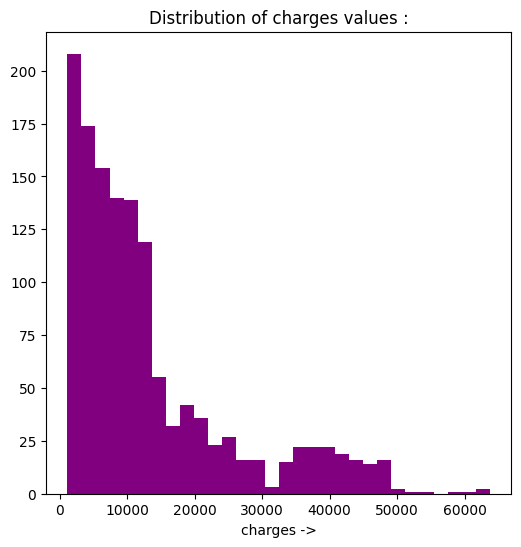

In [7]:
plt.figure(figsize=(6,6))
plt.hist(df.charges, bins = 'auto', color = 'purple')
plt.xlabel("charges ->")
plt.title("Distribution of charges values :")

'''
It is unevenly distributed.
Most beneficiaries are charged between 1000 to 10,000 units.
Very few are charged above 50,000.
'''

# Generate Box-plots to check for outliers and relation of each feature with 'charges'


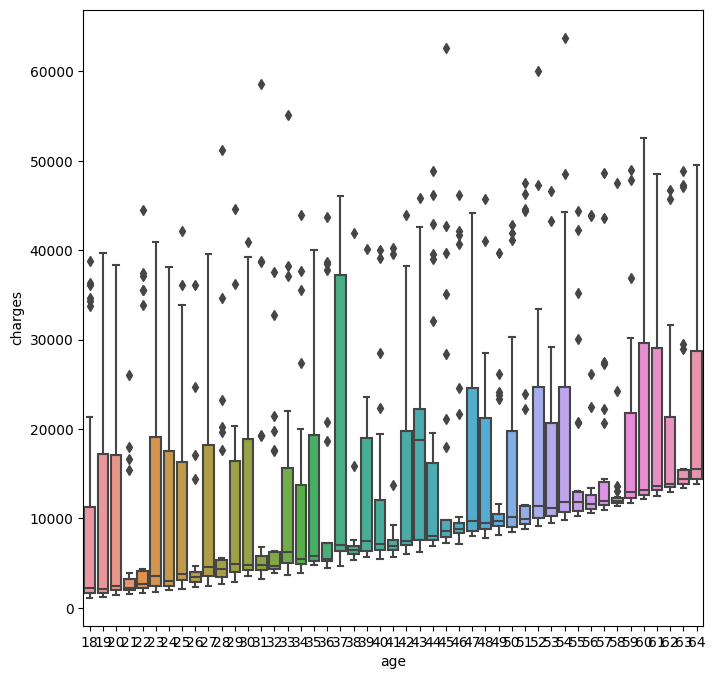

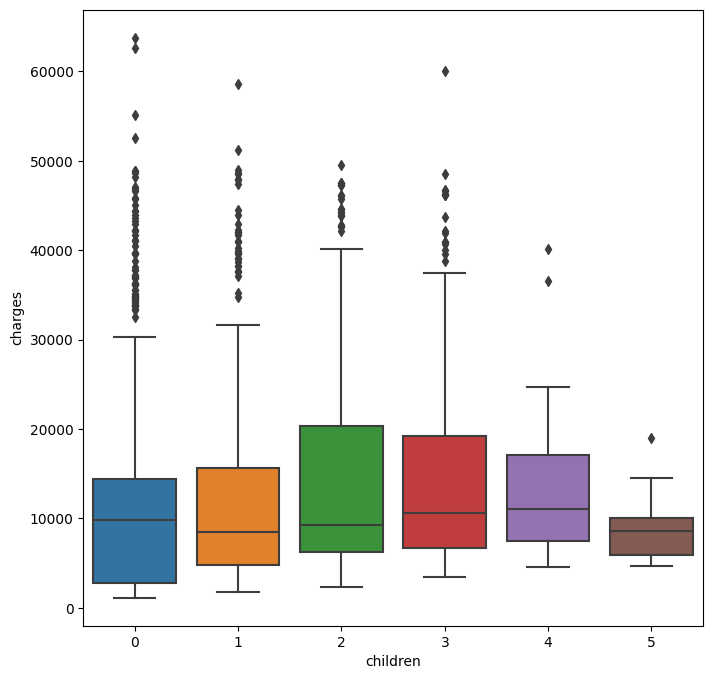

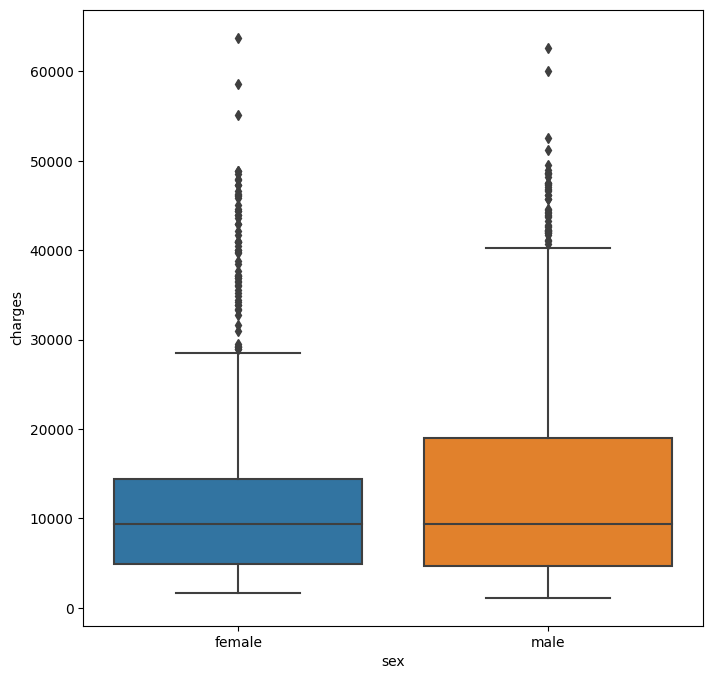

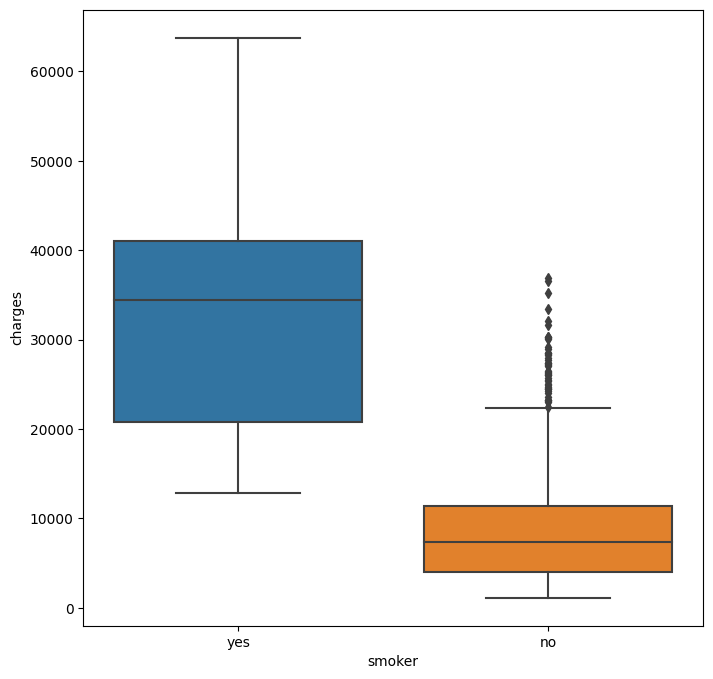

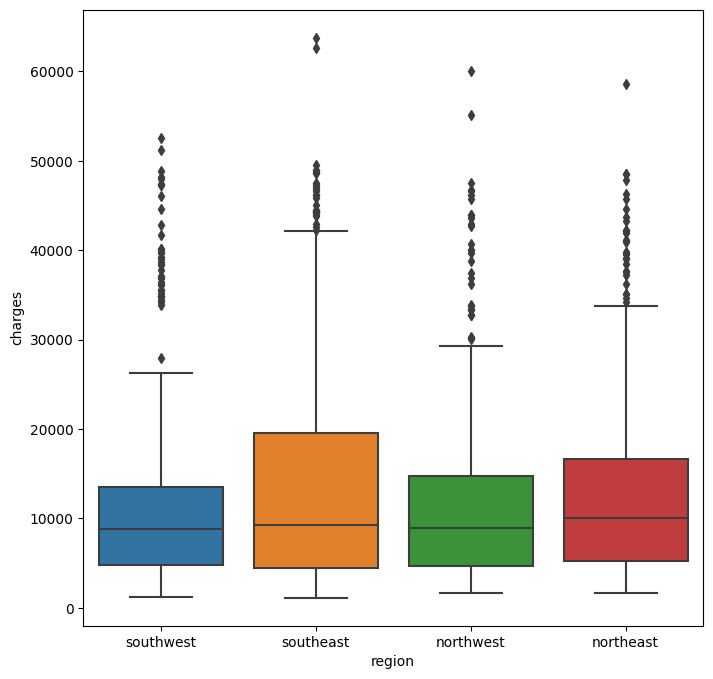

In [8]:
cols = ['age', 'children', 'sex', 'smoker', 'region']
for col in cols:
    plt.figure(figsize=(8,8))
    sns.boxplot(x = df[col], y = df['charges'])

# Converting categorical features' string values to int and LabelEncoder 'region'

In [9]:
df['smoker'] = [1 if x == 'yes' else 0 for x in df['smoker']]
df['sex'] = [1 if x == 'male' else 0 for x in df['sex']]

df.charges = pd.to_numeric(df.charges)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['region'] = label_encoder.fit_transform(df['region'])


In [10]:
#All columns are numerical column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 68.1 KB


# correlation


<AxesSubplot:>

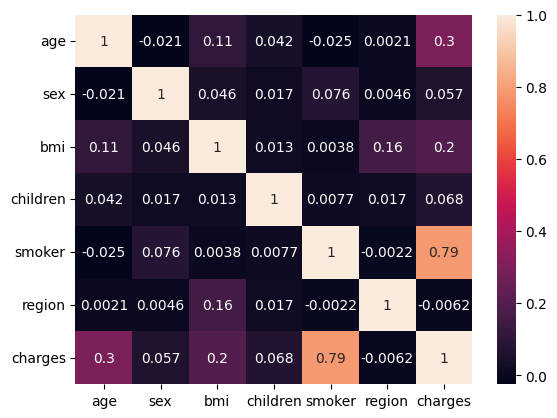

In [11]:
sns.heatmap(df.corr(), annot=True)

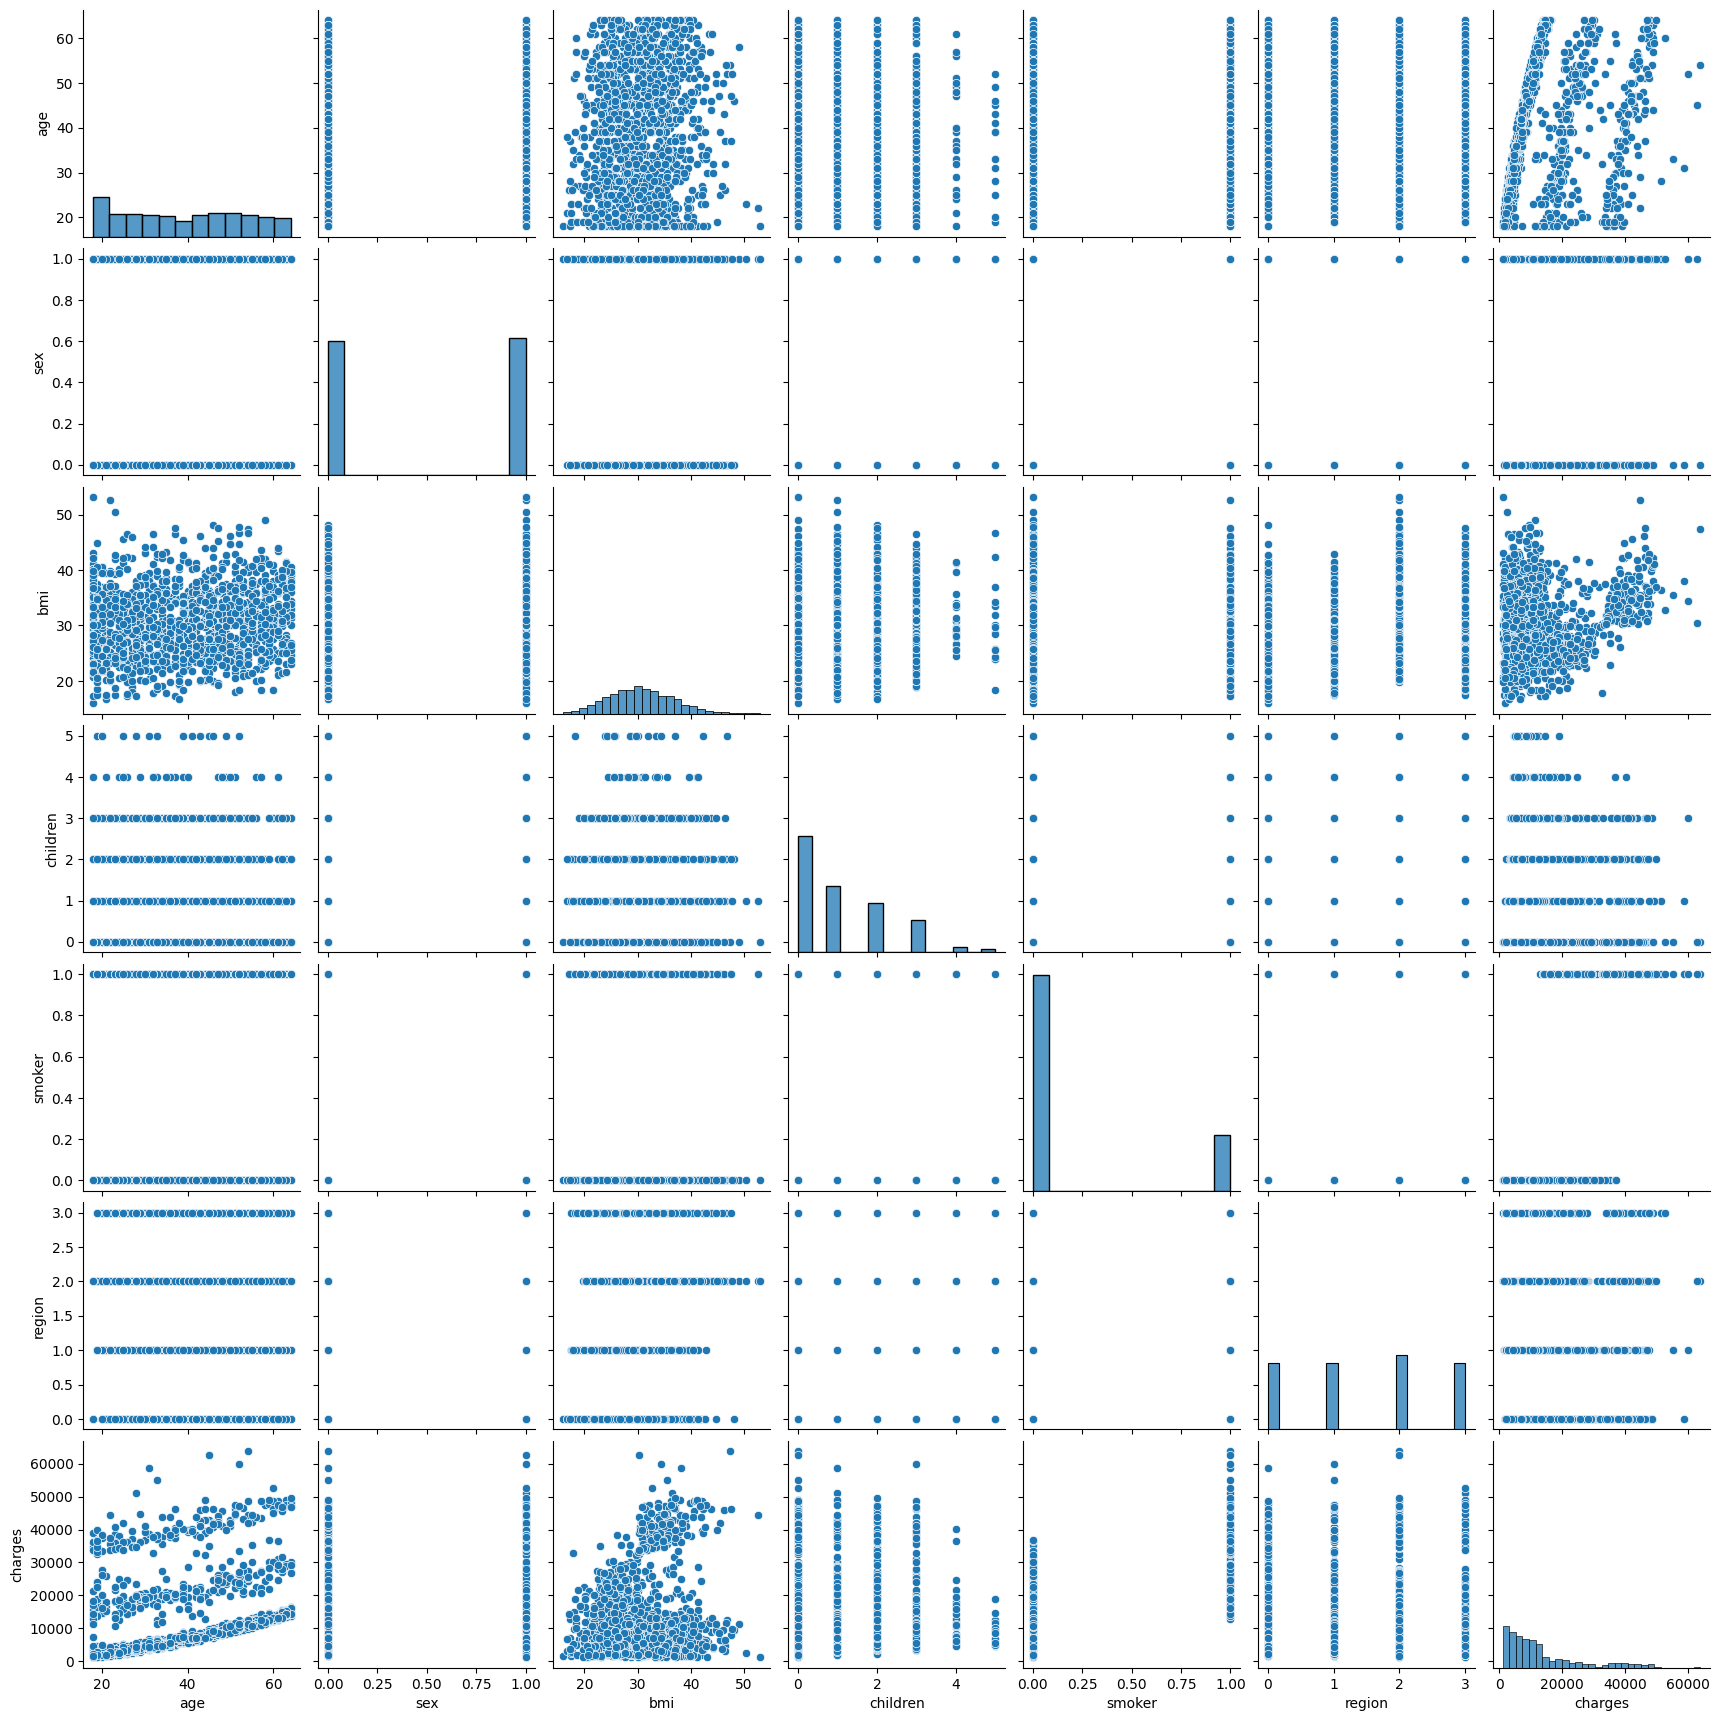

In [12]:
sns.pairplot(df)

# Split data

In [13]:
y = df['charges'].values
X = df.drop(['charges'], axis=1)

# Transformations


In [14]:
import numpy as np
from scipy import stats

y_log = np.log(y)
y_sqrt = np.sqrt(y)
y_boxcox, _ = stats.boxcox(y)


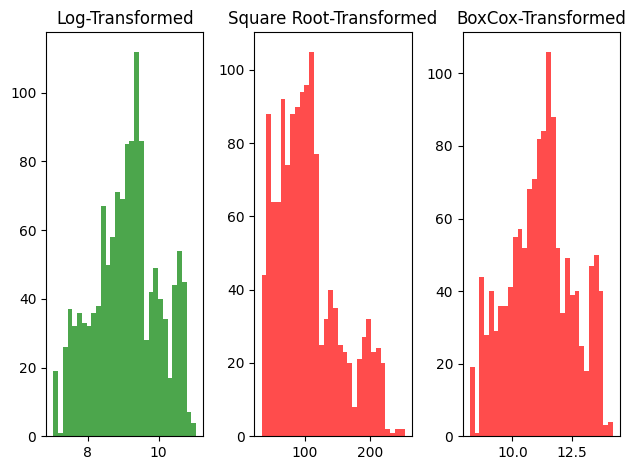

'\n-> we can use Log or BoxCox\n'

In [15]:
plt.subplot(131)
plt.hist(y_log, bins=30, color='green', alpha=0.7)
plt.title('Log-Transformed')

# Square root-transformed "charges" histogram
plt.subplot(132)
plt.hist(y_sqrt, bins=30, color='red', alpha=0.7)
plt.title('Square Root-Transformed')

plt.subplot(133)
plt.hist(y_boxcox, bins=30, color='red', alpha=0.7)
plt.title('BoxCox-Transformed')

plt.tight_layout()
plt.show()
'''
-> we can use Log or BoxCox
'''

# Choose Box Cox transformation


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y_boxcox, test_size = 0.2, random_state = 42)

mse_scores = {}
r2_scores = {}

# Linear Regression

In [17]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_test_pred = lin_reg.predict(X_test)
r2 = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
print("R2-score on test data:", r2)
print("MSE-score on test data:", mse)

mse_scores['LinearRegression'] = mse
r2_scores['LinearRegression'] = r2


R2-score on test data: 0.8051466900907313
MSE-score on test data: 0.3871168690976182


# 3 models:
- Lasso Regression
- Ridge Regression
- Elastic Net 
- Combine K-Folds, GridSearch, 

In [18]:
# Create models
models = {
    'Lasso Regression': Lasso(),
    'Ridge Regression': Ridge(),
    'ElasticNet': ElasticNetCV()
}

# Hyperparameter grid for GridSearchCV
param_grid = {
    'Lasso Regression': {'model__alpha': [0.001, 0.01, 0.1, 1.0]},
    'Ridge Regression': {'model__alpha': [0.001, 0.01, 0.1, 1.0]},
    'ElasticNet': {'model__l1_ratio': [0.1, 0.5, 0.7, 0.9]}
}

# Initialize K-Folds cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate through models
for model_name, model in models.items():
    # Create a pipeline with data preprocessing and the current model
    pipeline = Pipeline([
        ('model', model)
    ])
    
    # Perform GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(pipeline, param_grid[model_name], cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Get the best estimator from GridSearchCV
    best_model = grid_search.best_estimator_
    
    # Cross-validation
    y_pred = cross_val_predict(best_model, X_train, y_train, cv=kf)
    
    # Model evaluation on the test set
    y_test_pred = best_model.predict(X_test)
    
    # Calculate and print metrics
    mse = mean_squared_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    
    mse_scores[model_name] = mse
    r2_scores[model_name] = r2
    
    print(f"Model: {model_name}")
    print(f"Best Hyperparameters: {grid_search.best_params_}")
    print(f"Mean Squared Error on Test Set: {mse:.2f}")
    print(f"R-squared on Test Set: {r2:.2f}")
    print()

Model: Lasso Regression
Best Hyperparameters: {'model__alpha': 0.001}
Mean Squared Error on Test Set: 0.39
R-squared on Test Set: 0.81

Model: Ridge Regression
Best Hyperparameters: {'model__alpha': 0.1}
Mean Squared Error on Test Set: 0.39
R-squared on Test Set: 0.81

Model: ElasticNet
Best Hyperparameters: {'model__l1_ratio': 0.9}
Mean Squared Error on Test Set: 0.39
R-squared on Test Set: 0.80



# Random Forest

In [19]:
rf_reg = RandomForestRegressor()

# Predict using Random Forest Regressor.
rf_reg.fit(X_train, y_train)
predtestRF = rf_reg.predict(X_test)   
r2 =  r2_score(y_test, predtestRF)
mse = mean_squared_error(y_test, predtestRF)
print("R2-score on test data:", r2)    
print("MSE-score on test data:", mse)

mse_scores['RandomForestRegressor'] = mse
r2_scores['RandomForestRegressor'] = r2


R2-score on test data: 0.8483560638907995
MSE-score on test data: 0.30127240738978334


# Plot the Accuracy of 5 models

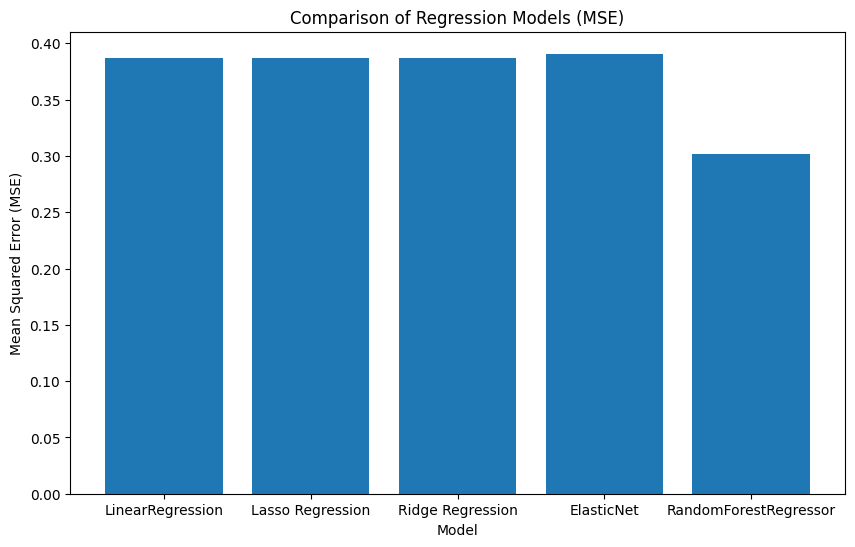

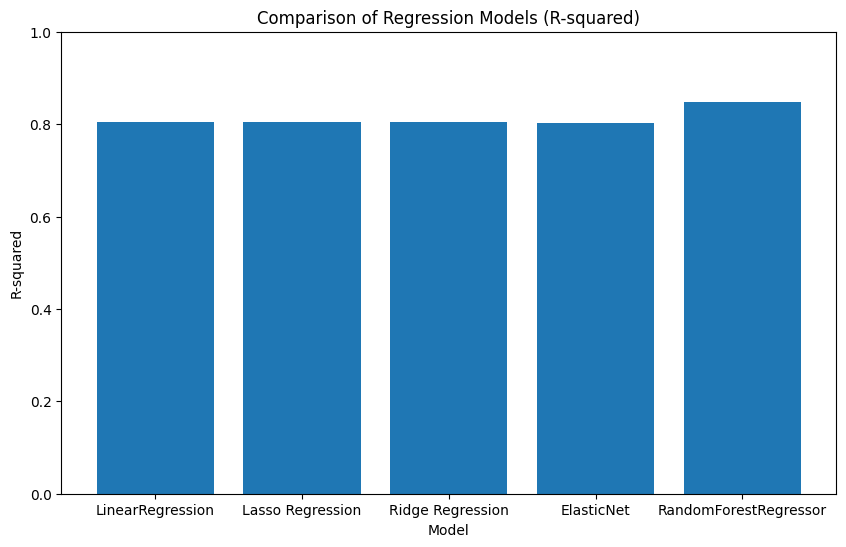

In [20]:
# Create a bar chart to compare models based on MSE
plt.figure(figsize=(10, 6))
plt.bar(mse_scores.keys(), mse_scores.values())
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Regression Models (MSE)')
plt.show()

# Create a bar chart to compare models based on R-squared
plt.figure(figsize=(10, 6))
plt.bar(r2_scores.keys(), r2_scores.values())
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.title('Comparison of Regression Models (R-squared)')
plt.ylim(0, 1)  # Set the y-axis limit for R-squared
plt.show()

# RandomForestRegressor: 
This model has the highest R-squared score (0.8457), and lowest MSE (0.30), indicating it provides the best predictive performance among the models used.

### 1. Linear Regression

**Strengths:**
- Simplicity and ease of interpretation.
- Fast training and prediction times.

**Flaws:**
- Assumes linearity, which may not always hold.
- Sensitive to outliers.
- Limited in capturing complex patterns.

**Further Suggestions:**
- Explore feature engineering for nonlinear relationships.
- Address outliers using robust regression techniques.
- Consider regularization techniques like Lasso or Ridge if needed.

### 2. Lasso Regression

**Strengths:**
- Feature selection capability.
- Handles multicollinearity.

**Flaws:**
- May reduce coefficients too aggressively.
- Not ideal for large feature sets.

**Further Suggestions:**
- Fine-tune the regularization strength (alpha).
- Consider ElasticNet for a balance between L1 and L2 regularization.

### 3. Ridge Regression

**Strengths:**
- Effective at handling multicollinearity.
- Stable coefficients.

**Flaws:**
- Doesn't perform feature selection.

**Further Suggestions:**
- Tune the regularization strength (alpha).
- Suitable when multicollinearity is suspected.

### 4. ElasticNetCV

**Strengths:**
- Balances L1 and L2 regularization.
- Robust to collinearity.

**Flaws:**
- Requires tuning of multiple hyperparameters.

**Further Suggestions:**
- Use cross-validation for hyperparameter tuning.
- Useful for balancing feature selection and multicollinearity.

### 5. Random Forest Regressor

**Strengths:**
- High predictive power for complex, nonlinear relationships.
- Robust to overfitting.
- Provides feature importance scores.

**Flaws:**
- Less interpretable than linear models.
- Longer training times for large datasets.

**Further Suggestions:**
- Fine-tune hyperparameters like the number of trees and tree depth.
- Explore feature importance analysis for feature selection.
- Suitable for complex, high-dimensional data.
